# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from math import sqrt
from statistics import mean
from scipy import stats as st
from sklearn.metrics import make_scorer
from matplotlib.patches import PathPatch
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, accuracy_score, mean_squared_error, mean_absolute_error

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')
display(data_train.head())
display(data_test.head())
display(data_full.head())


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [4]:
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [5]:
print(data_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [6]:
data_train.fillna(method='ffill')
data_test.fillna(method='ffill')
data_full.fillna(method='ffill')


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


<div class="alert alert-block alert-warning">
 Использовал dropna в конце этого раздела.
</div>

Все данные кроме даты в типе float64. Есть множество пропущенных значений. Вычислим эффективность обогащение на обучающей выборке для признака rougher.output.recovery. Найдем MAE между вашими расчётами и значением признака. 

def smape_calc(data, C,F,T):
    data['rougher.output.recovery.calc'] = (data[C]*(data[F]-data[T]))/(data[F]*(data[C]-data[T]))*100
    
smape_calc(data_train, 'rougher.output.concentrate_au','rougher.input.feed_au','rougher.output.tail_au')

print(data_train['rougher.output.recovery.calc', 'rougher.output.recovery'])


In [7]:
data_train['rougher.output.recovery.calc'] = (data_train['rougher.output.concentrate_au']*(data_train['rougher.input.feed_au']-
                                                                               data_train['rougher.output.tail_au']))/(data_train['rougher.input.feed_au']*(data_train['rougher.output.concentrate_au']-data_train['rougher.output.tail_au']))*100

In [8]:
data_train.dropna(inplace=True)
#print(data_train.info())
MAE_smape = mean_absolute_error(data_train["rougher.output.recovery.calc"], data_train['rougher.output.recovery'])
print("MAE=", MAE_smape)

MAE= 9.460144184559453e-15


Получился достаточно точный результат.

In [9]:
data_train.columns.difference(data_test.columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

<div class="alert alert-block alert-warning"> В данных колонках видим данные о концентрации веществ после всего техпроцесса:   
'final.output.concentrate_ag','final.output.concentrate_au','final.output.concentrate_pb','final.output.concentrate_sol',
хвосты после последнего этапа техпроцесса:
'final.output.recovery', final.output.tail_ag','final.output.tail_au','final.output.tail_pb','final.output.tail_sol',
концентрация после первой очистки:
'primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_pb','primary_cleaner.output.concentrate_sol',
хвосты после первой очистки:
'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au','primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
расчетные показатели сульфатов 1 этапа:       'rougher.calculation.au_pb_ratio','rougher.calculation.floatbank10_sulfate_to_au_feed','rougher.calculation.floatbank11_sulfate_to_au_feed','rougher.calculation.sulfate_to_au_concentrate',
концентрация и хвосты после первого этапа техпроцесса:    
'rougher.output.concentrate_ag','rougher.output.concentrate_au','rougher.output.concentrate_pb','rougher.output.concentrate_sol','rougher.output.recovery', 'rougher.output.recovery.calc','rougher.output.tail_ag','rougher.output.tail_au','rougher.output.tail_pb', 'rougher.output.tail_sol',
хвосты после второй очистки:       'secondary_cleaner.output.tail_ag','secondary_cleaner.output.tail_au','secondary_cleaner.output.tail_pb','secondary_cleaner.output.tail_sol'  
    
Как минимум  колонки - таргеты ('rougher.output.recovery', 'final.output.recovery') нам понадобятся в исследовании.
</div>

In [10]:
data_test_merge = data_full[['date','rougher.output.recovery', 'final.output.recovery']]

In [11]:
data_test = data_test.merge(data_test_merge, on='date', how='left')
#data_full_merge = data_full_merge.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

In [12]:
data_train.drop(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.recovery.calc',
       'rougher.output.tail_ag', 'rougher.output.tail_au',
       'rougher.output.tail_pb', 'rougher.output.tail_sol',
       'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_au',
       'secondary_cleaner.output.tail_pb',
       'secondary_cleaner.output.tail_sol'], axis=1, inplace=True)

In [13]:
#data_train.drop('date', axis=1, inplace=True)
#data_test.drop('date', axis=1, inplace=True)
#data_full.drop('date', axis=1, inplace=True)
data_train.dropna(0, inplace=True)
data_test.dropna(0, inplace=True)
data_full.dropna(0, inplace=True)

# 2. Анализ данных

Изучим концентрацию Au, Ag, Pb (Sol) на разных этапах очистки. Сначала создадим новый датафрейм из колонок с информацией о концентрации.

In [14]:

def  df_conc_calc(data_train):
    df_conc = pd.DataFrame()
    for name in ['final.output.concentrate_ag', 'final.output.concentrate_pb','final.output.concentrate_sol','final.output.concentrate_au','primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb','primary_cleaner.output.concentrate_sol','primary_cleaner.output.concentrate_au',  'rougher.input.feed_ag','rougher.input.feed_pb', 'rougher.input.feed_sol','rougher.input.feed_au', 'rougher.output.concentrate_ag','rougher.output.concentrate_pb', 'rougher.output.concentrate_sol','rougher.output.concentrate_au']:
        name_ab = name[-2:]
        step = name[:9]
        df_temp = pd.DataFrame()
        df_temp['conc'] = data_train[name]
        df_temp['name_ab'] = name_ab
        df_temp['step'] = step
        frames = [df_conc, df_temp]
        df_conc = pd.concat(frames).sort_values(by=['step'], ascending = False)
    return(df_conc)
full_conc = df_conc_calc(data_full)
display(full_conc)

,conc,name_ab,step
22715,11.959486,ag,rougher.o
11355,8.934093,pb,rougher.o
11358,8.829341,pb,rougher.o
11303,8.427852,pb,rougher.o
11302,8.376168,pb,rougher.o
...,...,...,...
12870,2.947412,ag,final.out
13221,39.708876,au,final.out
13182,4.490374,ag,final.out
14661,45.437618,au,final.out


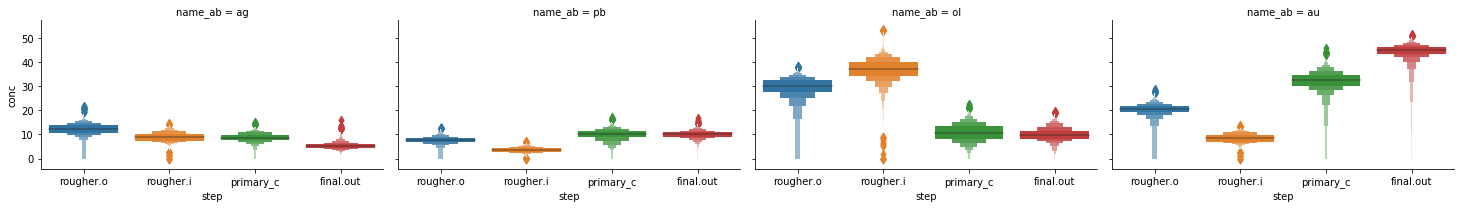

In [15]:
sns.catplot(x='step',
            y='conc',
            col='name_ab',
            #row='time',
            height = 3,
            aspect=1.7,
            kind='boxen',
            data=full_conc);

На 1 шаге (2 картинка) концентрация Au минимальна, концентрация Sol максимальна. С каждым шагом концентрация Au заметно возрастает, а SOl падает. Заметим, что концентрация Ag максимально на 2 промежутке, а концентрация  Pb на третьем. 

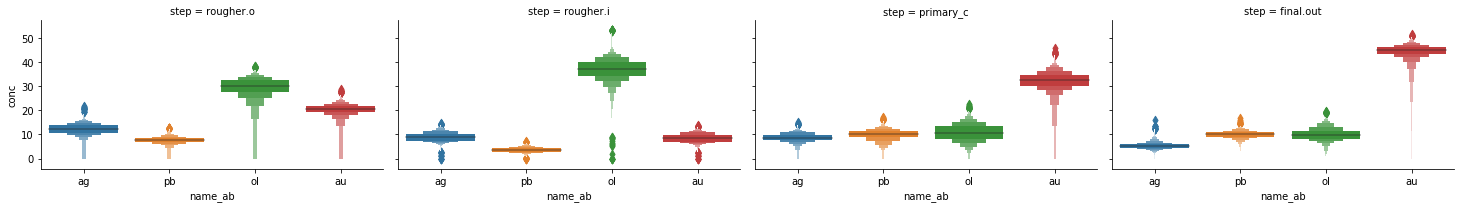

In [16]:
sns.catplot(x='name_ab',
            y='conc',
            col='step',
            #row='time',
            height = 3,
            aspect=1.7,
            kind='boxen',
            data=full_conc);

In [17]:
!pip install --upgrade pandas

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pandas in /home/jovyan/.local/lib/python3.7/site-packages (1.2.2)


import pandas as pd

order = {
    'a': 2,
    'b': 1,
    'c': 3
}

pd.DataFrame(['a', 'b', 'c'], columns=['col1']).sort_values(by='col1', key = lambda x: x.replace(order))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


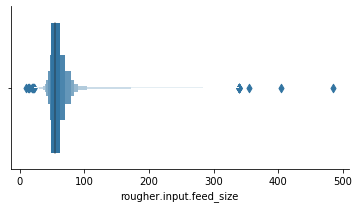

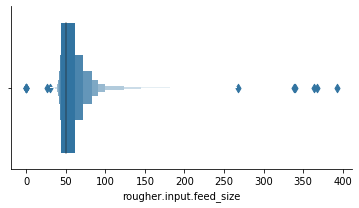

In [18]:
for data in [data_train,data_test]:
    sns.catplot(x='rougher.input.feed_size',
            #y='rougher.input.feed_size',
            #col='name_ab',
            #row='time',
            height = 3,
            aspect=1.7,
            kind='boxen',
            data=data);

<div class="alert alert-block alert-warning">
 Для наглядности следующего графика уберем выбивающиеся значения rougher.input.feed_size.

In [19]:
data_train_feed_size = pd.DataFrame()
data_test_feed_size = pd.DataFrame()

data_train_feed_size['rougher.input.feed_size'] = data_train.loc[data_train['rougher.input.feed_size']<150,'rougher.input.feed_size']

data_test_feed_size['rougher.input.feed_size'] = data_test.loc[data_test['rougher.input.feed_size']<150,'rougher.input.feed_size']


rougher.input.feed_size


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Legend does not support 'rougher.input.feed_size' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  """


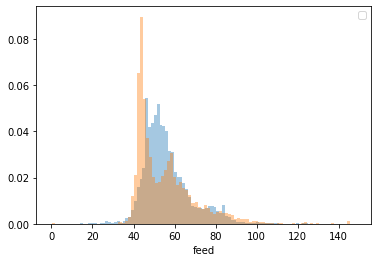

In [20]:
for name in ['rougher.input.feed_size']:
    print(name)
    for data in [data_train_feed_size, data_test_feed_size]:
        sns.distplot(data[name], kde=False, label=name, norm_hist=True, bins=100).set_xlabel('feed')
    _ = plt.legend(data_train_feed_size, data_test_feed_size)
    plt.show()

Видно, что распределения между train и test выборкой сопоставимы. Посмотрим на суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

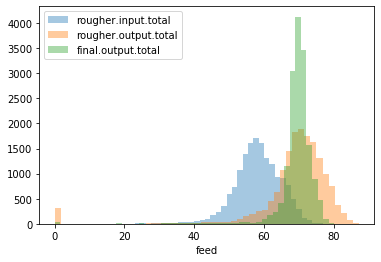

In [21]:
data_full['rougher.input.total_feed'] = data_full['rougher.input.feed_au'] + data_full['rougher.input.feed_ag'] + data_full['rougher.input.feed_pb'] + data_full['rougher.input.feed_sol']
data_full['rougher.output.total_conc'] = data_full['rougher.output.concentrate_au'] + data_full['rougher.output.concentrate_ag'] + data_full['rougher.output.concentrate_pb'] + data_full['rougher.output.concentrate_sol']
data_full['final.output.total_conc'] = data_full['final.output.concentrate_au'] + data_full['final.output.concentrate_ag'] + data_full['final.output.concentrate_pb'] + data_full['final.output.concentrate_sol']
for name in ['rougher.input.total_feed','rougher.output.total_conc','final.output.total_conc']:
    sns.distplot(data_full[name], kde=False, label=name).set_xlabel('feed')
_ = plt.legend(['rougher.input.total','rougher.output.total','final.output.total'])
plt.show()

Видно что финально распределение заметно лучше сконцентрировано у медианы.

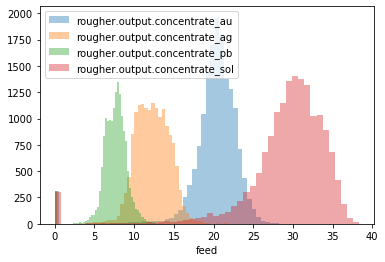

In [22]:
for name in ['rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_sol']:
    sns.distplot(data_full[name], kde=False, label=name).set_xlabel('feed')
_ = plt.legend(['rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_sol'])
plt.show()

In [23]:
data_full = data_full[(data_full['rougher.output.concentrate_au']>10)&(data_full['rougher.output.concentrate_ag']>5)&(data_full['rougher.output.concentrate_pb']>3)&(data_full['rougher.output.concentrate_sol']>10)]

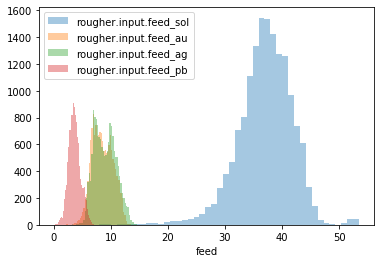

In [24]:
for name in ['rougher.input.feed_sol','rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb']:
    sns.distplot(data_full[name], kde=False, label=name).set_xlabel('feed')
_ = plt.legend(['rougher.input.feed_sol','rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb'])
plt.show()

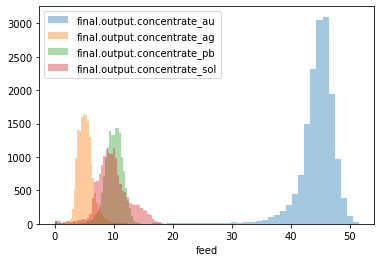

In [25]:
for name in ['final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_sol']:
    sns.distplot(data_full[name], kde=False, label=name).set_xlabel('feed')
_ = plt.legend(['final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_sol'])
plt.show()

In [26]:
data_full = data_full[(data_full['final.output.concentrate_au']>30)&(data_full['final.output.concentrate_ag']>2)&(data_full['final.output.concentrate_pb']>5)&(data_full['final.output.concentrate_sol']>3)]

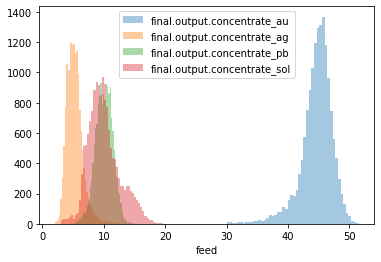

In [27]:
for name in ['final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_sol']:
    sns.distplot(data_full[name], kde=False, label=name).set_xlabel('feed')
_ = plt.legend(['final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_sol'])
plt.show()

In [28]:
for name in ['rougher.output.concentrate_sol','rougher.output.concentrate_pb','rougher.output.concentrate_ag',
    'rougher.output.concentrate_au','final.output.concentrate_au','final.output.concentrate_ag',
    'final.output.concentrate_pb','final.output.concentrate_sol']:
    try:
        print(data_train[name].head(1))
    except:
        print(f'{name} отсутствует в data_train')

rougher.output.concentrate_sol отсутствует в data_train
rougher.output.concentrate_pb отсутствует в data_train
rougher.output.concentrate_ag отсутствует в data_train
rougher.output.concentrate_au отсутствует в data_train
final.output.concentrate_au отсутствует в data_train
final.output.concentrate_ag отсутствует в data_train
final.output.concentrate_pb отсутствует в data_train
final.output.concentrate_sol отсутствует в data_train


In [29]:
for name in ['rougher.output.concentrate_sol','rougher.output.concentrate_pb','rougher.output.concentrate_ag',
    'rougher.output.concentrate_au','final.output.concentrate_au','final.output.concentrate_ag',
    'final.output.concentrate_pb','final.output.concentrate_sol']:
    try:
        print(data_test[name].head(1))
    except:
        print(f'{name} отсутствует в data_test')

rougher.output.concentrate_sol отсутствует в data_test
rougher.output.concentrate_pb отсутствует в data_test
rougher.output.concentrate_ag отсутствует в data_test
rougher.output.concentrate_au отсутствует в data_test
final.output.concentrate_au отсутствует в data_test
final.output.concentrate_ag отсутствует в data_test
final.output.concentrate_pb отсутствует в data_test
final.output.concentrate_sol отсутствует в data_test


<div class="alert alert-block alert-warning"> Колонки, в которых были аномалии в фулл_датасете, отсутствуют в тест_сете, и потому были удалены из трейн_сета.
</div>

In [30]:
print(len(data_train))
date_list = data_full['date']
data_train = data_train.query('date in @date_list')
print(len(data_train))
print(len(data_test))
data_test = data_test.query('date in @date_list')
print(len(data_test))

11017
10448
5229
4888


In [31]:
data_train.drop('date', axis=1, inplace=True)
data_test.drop('date', axis=1, inplace=True)
data_full.drop('date', axis=1, inplace=True)


Аномалии надо удалить. Скорее всего, они связаны с поломкой оборудования и в будущем маловероятно что повторятся. Это значит, что обучать и тестировать модели на испорченных данных не имеет смысла, таких ситуаций ведь в жизни больше не будет (ну или вероятность таких событий очень мала). Поэтому мы просто исключим эти строки из треина и теста.
    <br><br> Проще всего их исключить следующим образом: сделать индексом во всех таблицах дату (так как по дате есть соответствие между фулл и треин/тест датасетами). Удалить аномальные строки из фулл датасета, а затем оставить в треине и тесте только те строки с теми индексами, которые есть в фулл датасете.
    <br>

# 3. Модель

Напишем формулу для вычисления smape и обучим модели RandomForestRegressor и LinearRegression.

smape_result = smape_rougher * 0.25 + smape_final * 0.75

In [32]:
print(data_train['rougher.output.recovery'])

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 10448, dtype: float64


In [33]:
target_rougher_train = data_train['rougher.output.recovery']
target_final_train = data_train['final.output.recovery']
#target_train = data_train[["rougher.output.recovery", "final.output.recovery"]]
features_train = data_train.drop(columns=['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [34]:
target_rougher_test = data_test['rougher.output.recovery']
target_final_test = data_test['final.output.recovery']
features_test = data_test.drop(columns=['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [35]:
def smape(target, predict):
    smape_calc = np.sum((np.abs(target-predict)*2)/(np.abs(target)+np.abs(predict)))
    return(smape_calc/len(predict)*100)

my_scorer = make_scorer(smape, greater_is_better=False)

In [36]:
print(features_train)

       primary_cleaner.input.sulfate  primary_cleaner.input.depressant  \
0                         127.092003                         10.128295   
1                         125.629232                         10.296251   
2                         123.819808                         11.316280   
3                         122.270188                         11.322140   
4                         117.988169                         11.913613   
...                              ...                               ...   
16855                     123.381787                          8.028927   
16856                     120.878188                          7.962636   
16857                     105.666118                          7.955111   
16858                      98.880538                          7.984164   
16859                      95.248427                          8.078957   

       primary_cleaner.input.feed_size  primary_cleaner.input.xanthate  \
0                                 7.2

In [37]:
model = RandomForestRegressor(random_state=12345)
parameters={'n_estimators': range(5,10), 'max_depth': range(2,7)}

grid = GridSearchCV(model,parameters,scoring = my_scorer, cv=3)
grid.fit(features_train, target_rougher_train)
print('best_params: ',grid.best_params_)
smape_rougher = abs(grid.best_score_)
print('smape_rougher=',smape_rougher)

best_params:  {'max_depth': 3, 'n_estimators': 9}
smape_rougher= 6.501972255725969


In [38]:
grid.fit(features_train, target_final_train)
print('best_params: ',grid.best_params_)
smape_final = abs(grid.best_score_)
print('smape_final=',smape_final)

smape_result = smape_rougher * 0.25 + smape_final * 0.75
print('smape_result = ',smape_result)

best_params:  {'max_depth': 5, 'n_estimators': 6}
smape_final= 8.18820607069574
smape_result =  7.766647616953296


 Получаю значение smape 9.77

Попробуем кроссвалидацию

x_train, x_test, y_train, y_test = train_test_split(features_train, target_final_train, test_size=.25, random_state=12345)

smape_final = np.mean(cross_validate(model, x_train, y_train, cv=3, scoring=my_scorer)['test_score'])

x_train, x_test, y_train, y_test = train_test_split(features_train, target_rougher_train, test_size=.25, random_state=12345)
smape_rougher = np.mean(cross_validate(model, x_train, y_train, cv=3, scoring=my_scorer)['test_score'])

smape_result = abs(smape_rougher) * 0.25 + abs(smape_final) * 0.75
print('smape_result = ',smape_result)

Модель линейной регрессии.

Обучим на train

In [39]:
model_rougher = LinearRegression()
model_rougher.fit(features_train,target_rougher_train)

x_train, x_test, y_train, y_test = train_test_split(features_train, target_final_train, test_size=.25, random_state=12345)
model_final = LinearRegression()
model_final.fit(features_train,target_final_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Теперь воспользуемся для предсказаний тестовой выборкой.

In [40]:
predicted_rougher = model_rougher.predict(features_test)

predicted_final = model_final.predict(features_test)

Сделаем окончательный расчет.

In [41]:
smape_rougher = smape(target_rougher_test, predicted_rougher)
print(smape_rougher)

4.431329498735936


In [42]:
smape_final = smape(target_final_test, predicted_final)
print(smape_final)

7.397088202879928


In [43]:
smape_result = smape_rougher * 0.25 + smape_final * 0.75
print('smape_result = ',smape_result)

smape_result =  6.65564852684393


В результате использование разных подходов получили результаты smape: 9.77 и 6.65.